In [ ]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 

import seaborn as sns
from collections import Counter

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
import nltk
from nltk import punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #, force_remount = True

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
kaggle_jruvika = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/kaggle_jruvika_preprocess_lemmatized.pkl")
kaggle_utk = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/kaggle_utk_preprocess_lemmatized.pkl")
isot = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/isot_preprocess_lemmatized.pkl")
combined = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/combined_preprocess_lemmatized.pkl")

In [ ]:
from copy import deepcopy
df = deepcopy(combined)

In [ ]:
df.shape

(61136, 12)

# Stats

## Avg number of words

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def word_count(text):
    return len(word_tokenize(text))

In [ ]:
df['body_word_count'] = df['body'].progress_apply(word_count)

In [ ]:
df['title_word_count'] = df['title'].progress_apply(word_count)

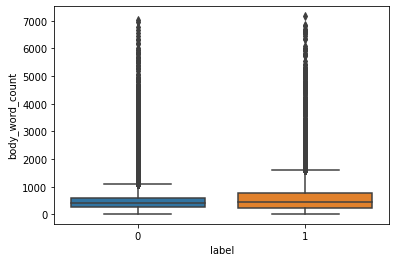

In [ ]:
ax = sns.boxplot(y = df['body_word_count'], x = df['label'] ,data = df)

In [ ]:
print('FAKE:')
print(df[df.label == 0]['body_word_count'].describe())
print()
print('REAL:')
print(df[df.label == 1]['body_word_count'].describe())

FAKE:
count    27907.000000
mean       525.057871
std        541.164094
min         14.000000
25%        260.000000
50%        397.000000
75%        593.000000
max       7025.000000
Name: body_word_count, dtype: float64

REAL:
count    33229.000000
mean       573.757531
std        516.267669
min         21.000000
25%        241.000000
50%        435.000000
75%        780.000000
max       7165.000000
Name: body_word_count, dtype: float64


## Avg word length

In [ ]:
def avg_word_len(text):
    return np.mean([len(x) for x in text.split()])

In [ ]:
df['body_avg_word_len'] = df['body'].progress_apply(avg_word_len)

In [ ]:
df['title_avg_word_len'] = df['title'].progress_apply(avg_word_len)

In [ ]:
print('FAKE:')
print(df[df.label == 0]['body_avg_word_len'].describe())
print()
print('REAL:')
print(df[df.label == 1]['body_avg_word_len'].describe())

FAKE:
count    27907.000000
mean         4.733974
std          0.409075
min          3.187500
25%          4.510490
50%          4.709602
75%          4.913963
max         20.569930
Name: body_avg_word_len, dtype: float64

REAL:
count    33229.000000
mean         4.902188
std          0.282899
min          3.483146
25%          4.723118
50%          4.901288
75%          5.080660
max          6.417391
Name: body_avg_word_len, dtype: float64


## Avg sentence length

In [ ]:
def avg_sent_len(text):
    return np.mean([len(x) for x in nltk.tokenize.sent_tokenize(text)])

In [ ]:
df['body_avg_sent_len'] = df['body'].progress_apply(avg_sent_len)

In [ ]:
df['title_avg_sent_len'] = df['title'].progress_apply(avg_sent_len)

## Average number of sentences

In [ ]:
def sent_count(text):
    return len(nltk.tokenize.sent_tokenize(text))

In [ ]:
df['body_sent_count'] = df['body'].progress_apply(sent_count)
df['title_sent_count'] = df['title'].progress_apply(sent_count)

## Most frequent words

In [ ]:
def most_freq_words(col, n = 20 ,  plot = True):
    
    l1,l2 = zip(*Counter(" ".join(col).split()).most_common(n))
    print(list(zip(l1, l2)))
    
    plt.bar(l1,l2)
    plt.xticks(rotation = 60)

[('said', 173117), ('trump', 91473), ('mr', 65218), ('would', 59011), ('president', 46065), ('new', 38456), ('one', 37461), ('people', 36331), ('state', 33102), ('also', 32843), ('reuters', 29943), ('states', 28162), ('government', 28096), ('could', 27244), ('united', 26282), ('year', 26007), ('house', 25395), ('two', 25152), ('last', 24725), ('told', 21808)]


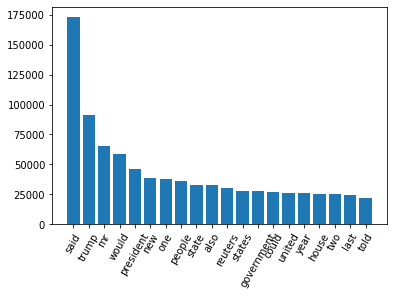

In [ ]:
most_freq_words(df[df.label == 1]['body_processed'])

[('trump', 87935), ('said', 37051), ('people', 36891), ('one', 35096), ('would', 34788), ('clinton', 32063), ('president', 29372), ('us', 26061), ('like', 24839), ('hillary', 22156), ('also', 21797), ('new', 21463), ('obama', 20499), ('donald', 20429), ('even', 20214), ('time', 20034), ('state', 18372), ('news', 16805), ('could', 15949), ('many', 15377)]


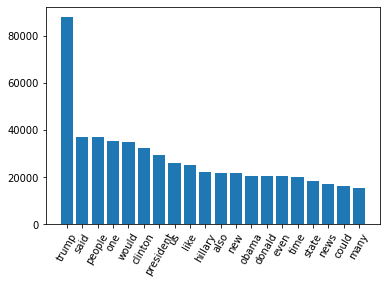

In [ ]:
most_freq_words(df[df.label == 0]['body_processed'])

[('trump', 7930), ('new', 7601), ('york', 6447), ('times', 6332), ('says', 3306), ('breitbart', 2399), ('house', 1683), ('russia', 1179), ('north', 1038), ('white', 1012), ('korea', 969), ('obama', 963), ('clinton', 948), ('china', 942), ('state', 909), ('court', 854), ('bill', 849), ('senate', 833), ('president', 754), ('election', 719)]


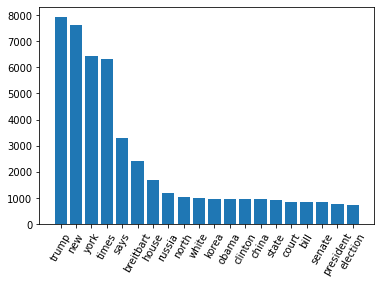

In [ ]:
most_freq_words(df[df.label == 1]['title_processed'])

[('trump', 8975), ('video', 6170), ('hillary', 2401), ('obama', 1902), ('clinton', 1631), ('watch', 1605), ('new', 1120), ('donald', 986), ('president', 962), ('news', 958), ('us', 858), ('white', 794), ('black', 775), ('gop', 767), ('election', 757), ('breaking', 752), ('america', 736), ('russia', 620), ('fbi', 612), ('tweets', 590)]


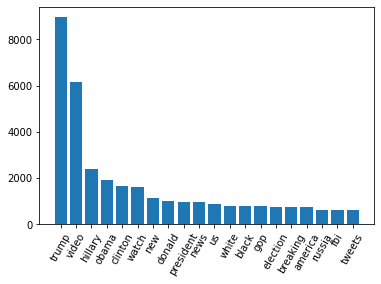

In [ ]:
most_freq_words(df[df.label == 0]['title_processed'])

## TextStat: Readability

In [ ]:
pip install textstat

     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 2.0MB 35.9MB/s 


In [ ]:
import textstat

In [ ]:
def flesch_reading_ease_func(text):
    return textstat.flesch_reading_ease(text)

def flesch_kincaid_grade_func(text):
    return textstat.flesch_kincaid_grade(text)

def gunning_fog_func(text):
    return textstat.gunning_fog(text)

In [ ]:
df['body_flesch_readability'] = df['body'].progress_apply(flesch_reading_ease_func)
df['title_flesch_readability'] = df['title'].progress_apply(flesch_reading_ease_func)

In [ ]:
df['body_flesch_kincaidgrade'] = df['body'].progress_apply(flesch_kincaid_grade_func)
df['title_flesch_kincaidgrade'] = df['title'].progress_apply(flesch_kincaid_grade_func)

In [ ]:
df['body_gunning_fog'] = df['body'].progress_apply(gunning_fog_func)
df['title_gunning_fog'] = df['title'].progress_apply(gunning_fog_func)

In [ ]:
df.head()

,title,body,label,title_length,body_length,lang,title_token,body_token,title_processed,title_lemma,body_processed,body_lemma,body_word_count,title_word_count,body_avg_word_len,title_avg_word_len,body_avg_sent_len,title_avg_sent_len,body_sent_count,title_sent_count,body_flesch_readability,title_flesch_readability,body_flesch_kincaidgrade,title_flesch_kincaidgrade,body_gunning_fog,title_gunning_fog
0,four ways bob corker skewered donald trump,image copyright getty images\non sunday mornin...,1,42,6412,True,"[four, ways, bob, corker, skewered, donald, tr...","[image, copyright, getty, images, sunday, morn...",four ways bob corker skewered donald trump,four way bob corker skewer donald trump,image copyright getty images sunday morning do...,image copyright getty image sunday morning don...,1219,7,4.949168,5.142857,127.740000,42.0,50,1,-1006.12,81.29,419.4,3.7,431.59,2.80
1,linklater's war veteran comedy speaks to moder...,"london (reuters) - “last flag flying”, a comed...",1,66,3325,True,"[linklater, war, veteran, comedy, speaks, mode...","[london, reuters, last, flag, flying, vietnam,...",linklater war veteran comedy speaks modern ame...,linklater war veteran comedy speak modern amer...,london reuters last flag flying vietnam war ve...,london reuters last flag fly vietnam war veter...,672,12,5.030797,5.700000,207.125000,66.0,16,1,-468.85,44.41,215.0,9.6,222.30,12.00
2,trump’s fight with corker jeopardizes his legi...,the feud broke into public view last week when...,1,60,6580,True,"[trump, fight, corker, jeopardizes, legislativ...","[feud, broke, public, view, last, week, corker...",trump fight corker jeopardizes legislative agenda,trump fight corker jeopardize legislative agenda,feud broke public view last week corker said t...,feud break public view last week corker say tr...,1285,10,5.010027,6.625000,155.976190,60.0,42,1,-1033.53,46.44,429.9,8.8,442.56,13.20
3,egypt's cheiron wins tie-up with pemex for mex...,mexico city (reuters) - egypt’s cheiron holdin...,1,68,630,True,"[egypt, cheiron, wins, pemex, mexican, onshore...","[mexico, city, reuters, egypt, cheiron, holdin...",egypt cheiron wins pemex mexican onshore oil f...,egypt cheiron win pemex mexican onshore oil field,mexico city reuters egypt cheiron holdings lim...,mexico city reuters egypt cheiron holding limi...,112,12,5.505155,5.272727,209.333333,68.0,3,1,-34.43,68.77,41.9,6.4,45.48,8.04
4,jason aldean opens 'snl' with vegas tribute,"country singer jason aldean, who was performin...",1,43,213,True,"[jason, aldean, opens, vegas, tribute]","[country, singer, jason, aldean, performing, l...",jason aldean opens vegas tribute,jason aldean open vegas tribute,country singer jason aldean performing las veg...,country singer jason aldean perform las vegas ...,46,8,4.710526,5.285714,216.000000,43.0,1,1,49.83,81.29,15.8,3.7,17.31,2.80


## Sentiment

### SentiStrength

http://sentistrength.wlv.ac.uk/

Automatic sentiment analysis of up to 16,000 social web texts per second with up to human level accuracy for English - other languages available or easily added.
Works best for SHORT informal texts. We can use it for headlines.

Scores:
   - -1 (not negative) to -5 (extremely negative)
   - 1 (not positive) to 5 (extremely positive)

In [ ]:
pip install sentistrength

In [ ]:
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('./gdrive/MyDrive/IR_Lab/Datasets/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('./gdrive/MyDrive/IR_Lab/Datasets/SentStrength_Data_Sept2011/')

In [ ]:
# Examples
print(senti.getSentiment('What a beautiful day'))
print(senti.getSentiment('I\'m foolishly happy'))
print(senti.getSentiment('That is not horrible'))
print(senti.getSentiment('That is horrible'))

[2]
[0]
[0]
[-3]


In [ ]:
def senti_strength_func(text):
    return senti.getSentiment(text)[0]

In [ ]:
df['title_senti_strength'] = df['title'].progress_apply(senti_strength_func)

### TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_polarity(text):
    polarity, _ = TextBlob(text).sentiment
    return polarity

def textblob_subjectivity(text):
    _, subjectivity = TextBlob(text).sentiment
    return subjectivity

In [ ]:
df['title_polarity'] = df['title'].progress_apply(textblob_polarity)
df['title_subjectivity'] = df['title'].progress_apply(textblob_subjectivity)

In [ ]:
df['body_polarity'] = df['body'].progress_apply(textblob_polarity)
df['body_subjectivity'] = df['body'].progress_apply(textblob_subjectivity)

### Vader

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def Vader_compound_func(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

In [ ]:
df['title_compound_sentiment'] = df['title'].progress_apply(Vader_compound_func)

https://local.cis.strath.ac.uk/wp/extras/msctheses/papers/strath_cis_publication_2733.pdf

In [ ]:
### df.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/EDA_combined.pkl")

In [ ]:
###pos_features.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined.pkl")

## Type Token  Ratio or Lexical Diversity

-https://www.sltinfo.com/wp-content/uploads/2014/01/type-token-ratio.pdf

In [ ]:
df = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/EDA_combined.pkl")

In [ ]:
def type_token_ratio(text):
  words = [word for word in word_tokenize(text) if word.isalpha()]
  
  total = len(words)
  uniq_words = len(set(words))

  return  uniq_words/total

In [ ]:
df['body_TTR'] = df['body'].progress_apply(type_token_ratio)

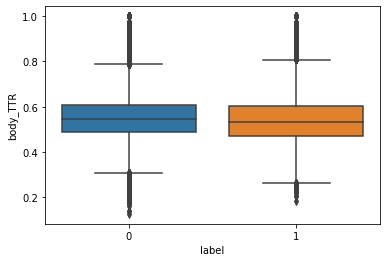

In [ ]:
ax = sns.boxplot(y = df['body_TTR'], x = df['label'] ,data = df)

## Stylistic Features

In [ ]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from collections import Counter
import string
def POS_counter(text):
  return Counter([j for i,j in pos_tag(word_tokenize(text))])

In [ ]:
POS_dict = df['body_processed'].progress_apply(POS_counter)

In [ ]:
pos_features = pd.DataFrame.from_dict(list(POS_dict))

In [ ]:
pos_features.head()

,NN,VBD,JJ,NNS,VBP,RB,VBG,IN,JJR,NNP,VB,CD,VBZ,VBN,MD,RBR,FW,PRP,DT,JJS,WP$,RBS,NNPS,RP,WDT,CC,UH,WRB,WP,EX,PRP$,POS,PDT,SYM,'',TO,$,``
0,236.0,22.0,107.0,60.0,27.0,42.0,25.0,8.0,4.0,1.0,5.0,4.0,17.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133.0,11.0,61.0,26.0,8.0,10.0,20.0,6.0,2.0,2.0,4.0,6.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,234.0,33.0,121.0,60.0,26.0,31.0,36.0,13.0,1.0,NaN,11.0,1.0,10.0,14.0,6.0,1.0,NaN,1.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,4.0,15.0,8.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,1.0,3.0,4.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pos_features =  pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined.pkl")

In [ ]:
pos_features.fillna(0,  inplace=  True)

In [ ]:
for col in pos_features:
  pos_features.rename(columns={col: "body_"+str(col)}, inplace=True)

In [ ]:
pos_features.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined.pkl")

In [ ]:
POS_dict_title = df['title_processed'].progress_apply(POS_counter)

In [ ]:
pos_features_title = pd.DataFrame.from_dict(list(POS_dict_title))

In [ ]:
for col in pos_features_title:
  pos_features_title.rename(columns={col: "title_"+str(col)}, inplace=True)

In [ ]:
pos_features_title.fillna(0,  inplace=  True)

In [ ]:
pos_features_title.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined_title.pkl")

In [ ]:
df_final = pd.concat([df, pos_features], axis=1)

## Emotions: Empath
https://hci.stanford.edu/publications/2016/ethan/empath-chi-2016.pdf

In [ ]:
pip install empath

     |████████████████████████████████| 61kB 7.0MB/s 
  Created wheel for empath: filename=empath-0.89-cp37-none-any.whl size=57823 sha256=06cc93a6402b0b293239bc93fbd8e37b45c3be17099fbf070a17dad3c24b2590
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


In [ ]:
df =  pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/df_70features.pkl")

In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
def Empath_func(text):
  return lexicon.analyze(text, normalize=True)
  #empath_dict = lexicon.analyze(text, normalize=True)
  #return {'love':empath_dict["love"],'joy':empath_dict["joy"],'surprise':empath_dict["surprise"],
  #'anger':empath_dict["anger"],'sadness':empath_dict["sadness"],'fear': empath_dict["fear"]}
  #  sorted(d.items(), key=lambda x: x[1], reverse=True)

In [ ]:
title_empath_dict  =  df['title'].progress_apply(Empath_func)

In [ ]:
df_title_empath_dict = pd.DataFrame.from_dict(list(title_empath_dict))
df_title_empath_dict.columns = ['title_emo_'+str(col) for col in df_title_empath_dict.columns]
#df_title_empath_dict.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/title_empath_dict.pkl")

In [ ]:
body_empath_dict  =  df['body'].progress_apply(Empath_func)

In [ ]:
df_body_empath_dict = pd.DataFrame.from_dict(list(body_empath_dict))
df_body_empath_dict.columns = ['body_emo_'+str(col) for col in df_body_empath_dict.columns]
#df_body_empath_dict.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/body_empath_dict.pkl")

In [ ]:
print(df.shape)
print(df_body_empath_dict.shape)
print(df_title_empath_dict.shape)

(61136, 70)
(61136, 194)
(61136, 194)


In [ ]:
df_final = pd.concat([df, df_body_empath_dict, df_title_empath_dict], axis=1)

In [ ]:
df_final.shape

(61136, 458)

# Final dataset

In [ ]:
#df =  pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/df_70features.pkl")
#df_body_empath_dict = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/body_empath_dict.pkl")
#df_title_empath_dict = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/title_empath_dict.pkl")

In [ ]:
df =  pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/EDA_combined.pkl")
df_body_empath_dict = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/body_empath_dict.pkl")
df_body_pos_features = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined.pkl")
df_title_empath_dict = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/title_empath_dict.pkl")
df_title_pos_features = pd.read_pickle("./gdrive/MyDrive/IR_Lab/Datasets/POS_features_combined_title.pkl")

In [ ]:
df_final = pd.concat([df, df_body_empath_dict,df_body_pos_features, df_title_empath_dict, df_title_pos_features], axis=1)

In [ ]:
df_final.shape

(61136, 494)

In [ ]:
#df_final.to_pickle("./gdrive/MyDrive/IR_Lab/Datasets/final_features_combined.pkl")